# Module Import 

In [1]:
from scipy import stats
!pip install statannot
from statannot import add_stat_annotation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


# Data Load

In [35]:
## Normalize함
result_tfidf = pd.read_excel('/project/Roblox/smcho1201/result_tfidf_norm.xlsx', index_col=0)
result_wordcount = pd.read_excel('/project/Roblox/smcho1201/result_wordcount_norm.xlsx',index_col=0)
result_fisher = pd.read_excel('/project/Roblox/smcho1201/result_fisher_norm.xlsx',index_col=0)
# result_nothing = pd.read_excel('/project/Roblox/smcho1201/result_all_data.xlsx', index_col=0)

result_random = pd.read_excel('/project/Roblox/smcho1201/result_random_norm.xlsx', index_col=0)

In [22]:
data_tfidf = result_tfidf.copy()
data_wordcount = result_wordcount.copy()
data_fisher = result_fisher.copy()
# data_nothing = result_nothing.copy()
data_random = result_random.copy()

In [23]:
data_tfidf = data_tfidf.T.reset_index()
data_tfidf.rename(columns={'index' : 'Model'}, inplace=True)
data_tfidf['Method'] = 'TF-IDF'
data_tfidf = pd.melt(data_tfidf, id_vars=['Model', 'Method'],
        var_name='Try', value_name='value')
data_tfidf.shape

(60, 4)

In [24]:
data_wordcount = data_wordcount.T.reset_index()
data_wordcount.rename(columns={'index' : 'Model'}, inplace=True)
data_wordcount['Method'] = 'WordCount'
data_wordcount = pd.melt(data_wordcount, id_vars=['Model', 'Method'],
        var_name='Try', value_name='value')


In [25]:
data_fisher = data_fisher.T.reset_index()
data_fisher.rename(columns={'index' : 'Model'}, inplace=True)
data_fisher['Method'] = "Fisher's Exact Test" 
data_fisher = pd.melt(data_fisher, id_vars=['Model', 'Method'],
        var_name='Try', value_name='value')

In [26]:
data_random = data_random.T.reset_index()
data_random.rename(columns={'index' : 'Model'}, inplace=True)
data_random['Method'] = "Random" 
data_random = pd.melt(data_random, id_vars=['Model', 'Method'],
        var_name='Try', value_name='value')

In [27]:
alldf = pd.concat([data_fisher, data_tfidf, data_wordcount,data_random], axis=0)
alldf.shape

(240, 4)

In [30]:
alldf = alldf.reset_index(drop=True)
alldf

,Model,Method,Try,value
0,RandomForest,Fisher's Exact Test,0,1.0
1,AdaBoost,Fisher's Exact Test,0,0.3
2,GradientBoosting,Fisher's Exact Test,0,0.6
3,XGBoost,Fisher's Exact Test,0,1.0
4,LightGBM,Fisher's Exact Test,0,0.7
...,...,...,...,...
235,AdaBoost,Random,9,0.1
236,GradientBoosting,Random,9,0.1
237,XGBoost,Random,9,0.1
238,LightGBM,Random,9,0.1


In [31]:
alldf[alldf['Method']=="Fisher's Exact Test"].groupby('Model').mean().sort_values(by='value', ascending=True)

/tmp/ipykernel_981933/3905071756.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  alldf[alldf['Method']=="Fisher's Exact Test"].groupby('Model').mean().sort_values(by='value', ascending=True)


,value
Model,
AdaBoost,0.27
LightGBM,0.59
GradientBoosting,0.85
XGBoost,0.89
RandomForest,0.93
CatBoost,0.94


In [32]:
order_li = list(alldf[alldf['Method']=="Fisher's Exact Test"].groupby('Model').mean().sort_values(by='value', ascending=True).index)

/tmp/ipykernel_981933/2539243534.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order_li = list(alldf[alldf['Method']=="Fisher's Exact Test"].groupby('Model').mean().sort_values(by='value', ascending=True).index)


In [33]:
order_li

['AdaBoost',
 'LightGBM',
 'GradientBoosting',
 'XGBoost',
 'RandomForest',
 'CatBoost']

# 통계검정

In [34]:
## 예쁘게 만들기 위해서 검정값을 만들어줌
pvalues = [0.1, 0.1,0.1,
           0.1, 0.05, 0.1,
           0.1, 0.05, 0.1,
           0.1, 0.01, 0.1,
           0.1, 0.1, 0.1,
           0.1, 0.1, 0.1]
len(pvalues)

18

In [17]:
order_li

['AdaBoost',
 'LightGBM',
 'GradientBoosting',
 'XGBoost',
 'RandomForest',
 'CatBoost']

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  pratt
XGBoost_TF-IDF v.s. XGBoost_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=7.815e-01 stat=1.750e+01
Using zero_method  pratt
GradientBoosting_TF-IDF v.s. GradientBoosting_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=8.718e-02 stat=6.500e+00
Using zero_method  pratt
LightGBM_TF-IDF v.s. LightGBM_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=4.543e-01 stat=1.550e+01
Using zero_method  pratt
RandomForest_TF-IDF v.s. RandomForest_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=8.326e-02 stat=0.000e+00
Using zero_method  pratt
CatBoost_TF-IDF v.s. CatBoost_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=8.151e-03 stat=0.000e+00
Using zero_method  pratt
CatBoost_WordCount v.s. CatBoost_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=5.

/package/anaconda3.8/lib/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Using zero_method  pratt
RandomForest_WordCount v.s. RandomForest_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=7.325e-03 stat=0.000e+00
Using zero_method  pratt
XGBoost_WordCount v.s. XGBoost_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=1.953e-03 stat=0.000e+00
Using zero_method  pratt
GradientBoosting_WordCount v.s. GradientBoosting_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=1.085e-02 stat=0.000e+00
Using zero_method  pratt
LightGBM_WordCount v.s. LightGBM_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=9.574e-01 stat=2.200e+01
Using zero_method  pratt
AdaBoost_WordCount v.s. AdaBoost_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=1.573e-01 stat=0.000e+00
Using zero_method  pratt
RandomForest_Random v.s. RandomForest_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=1.953e-03 stat=0.000e+00
Using zero_method  pratt
CatBoost_Random v.s. CatBoost_Fisher's Exact Test: Wilcoxon test (paired samples), P_val=1.953e-

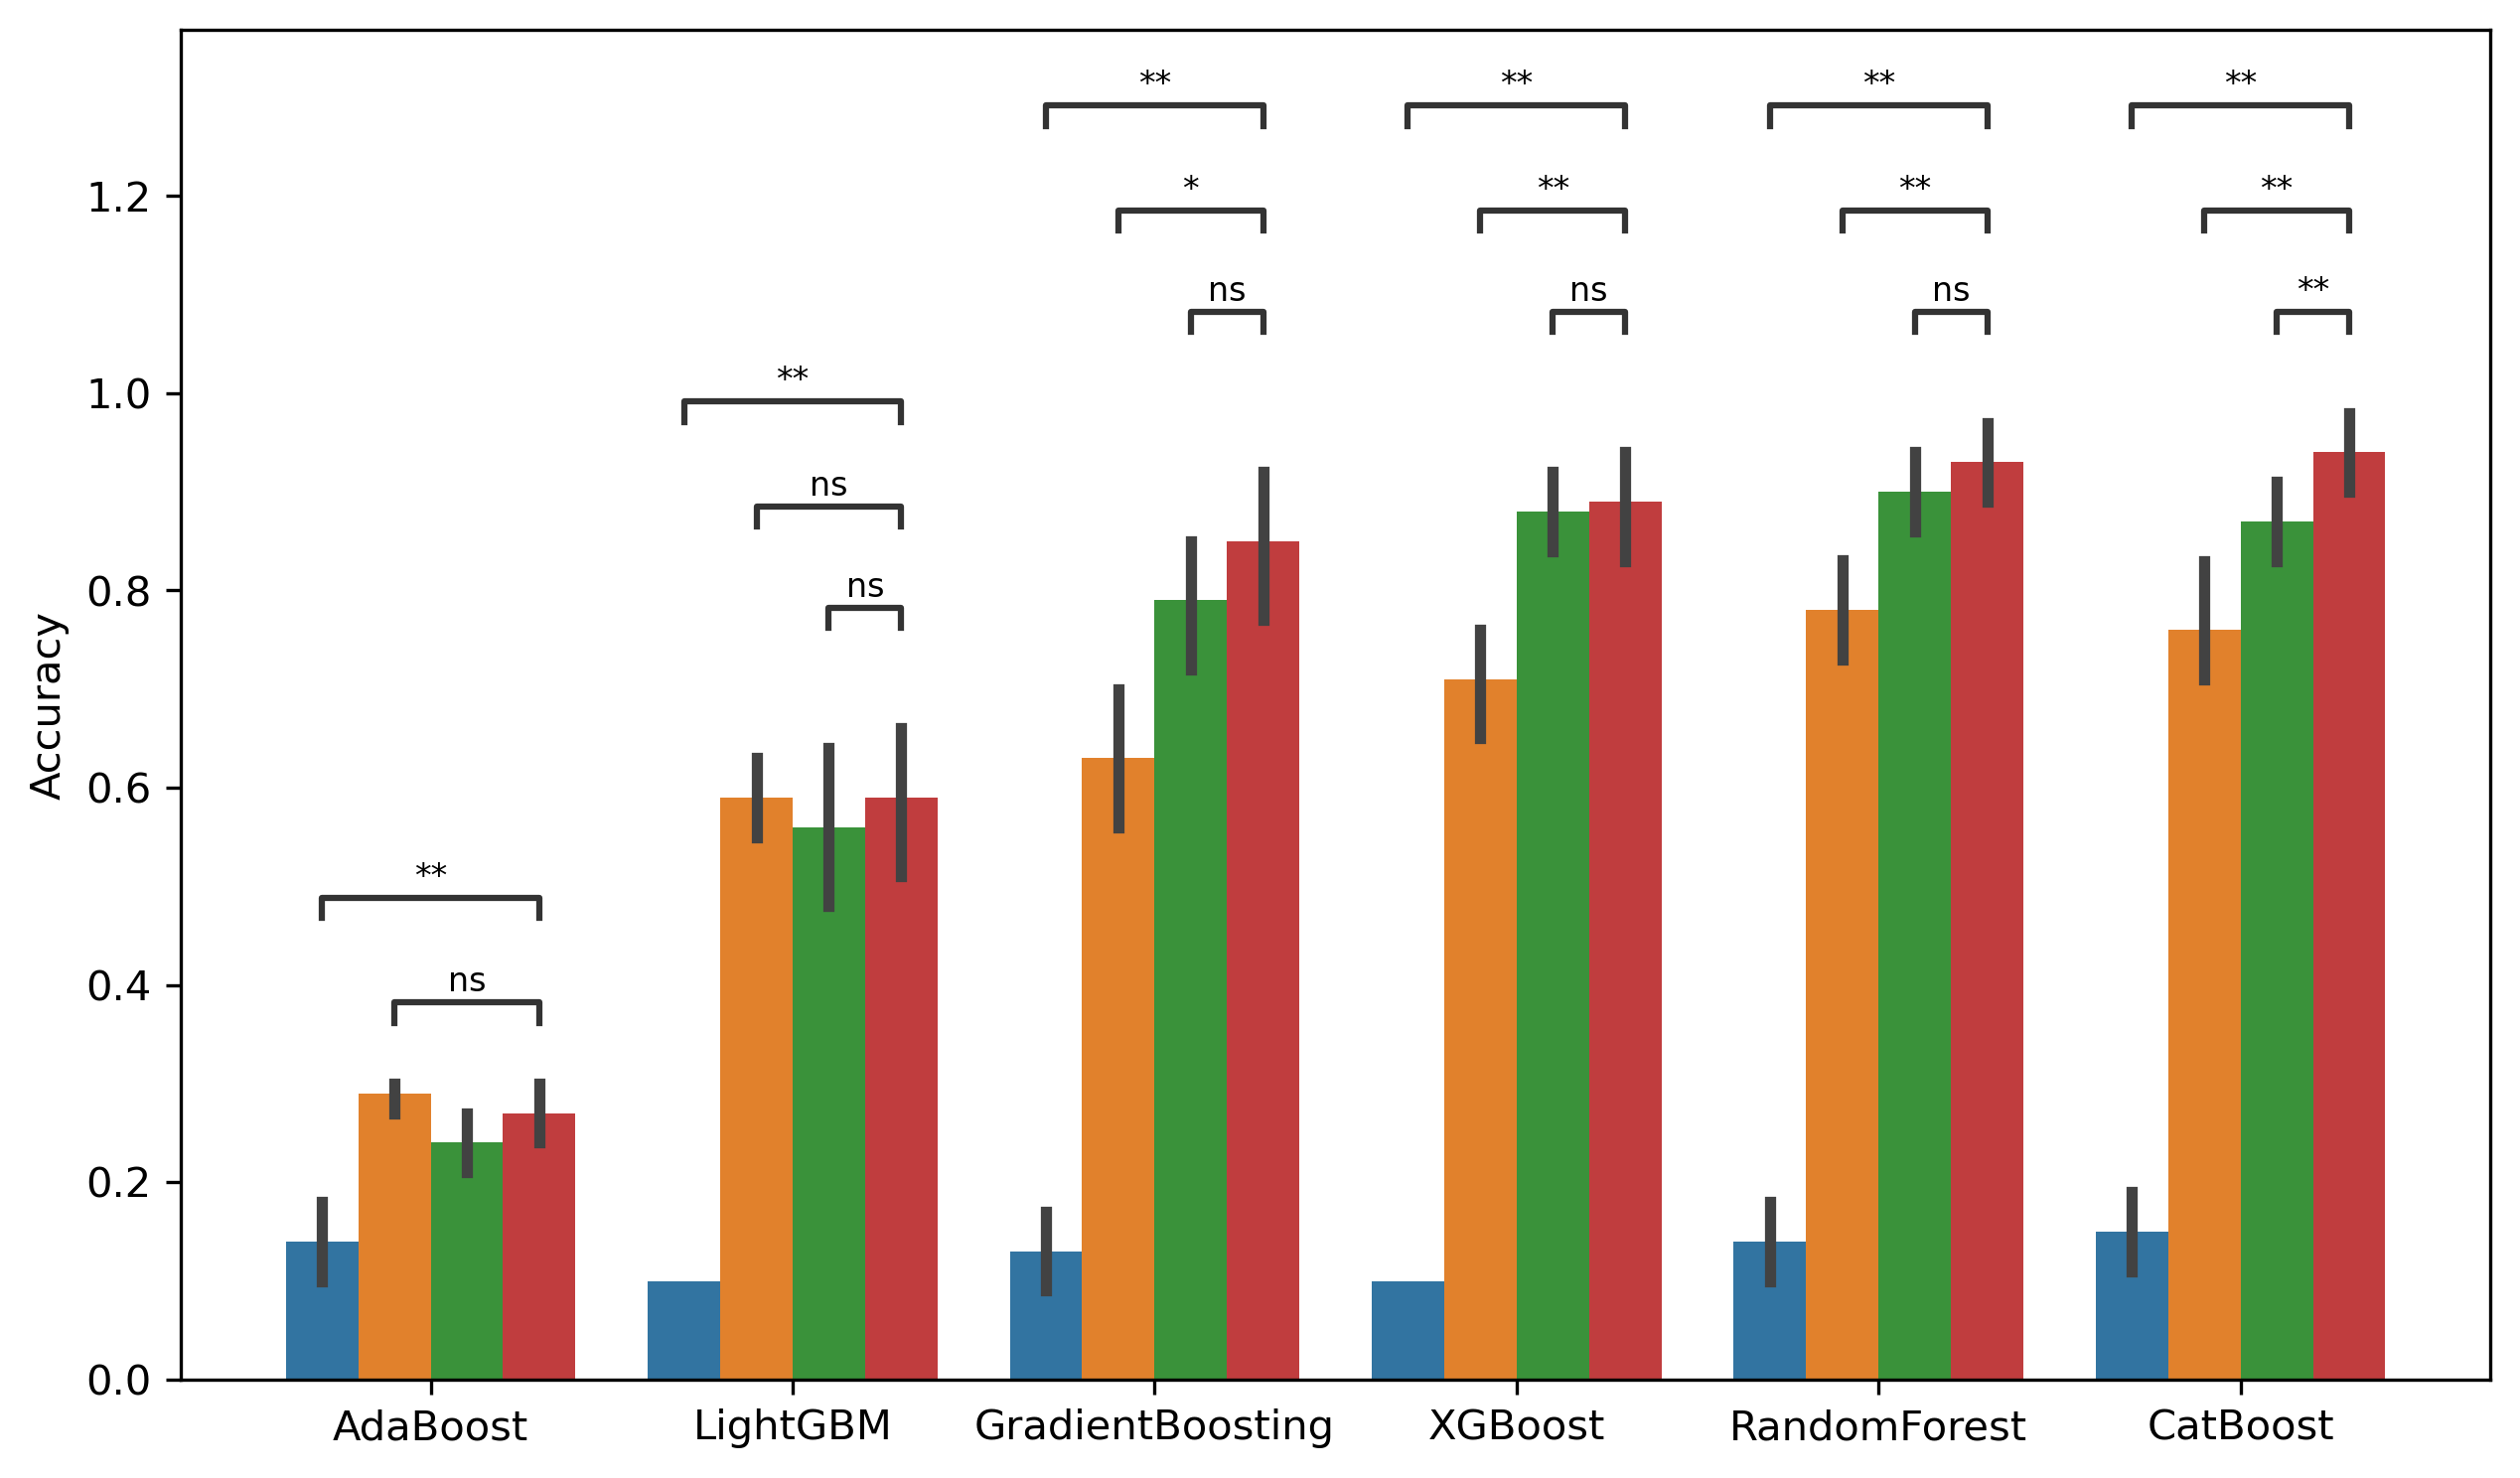

(<AxesSubplot:ylabel='Accuracy'>,
  <statannot.StatResult.StatResult at 0x7f71649ad820>])

In [36]:

hue_order = ['Random', 'WordCount', 'TF-IDF', "Fisher's Exact Test"]


fig = plt.figure(figsize=(10,6), dpi=300)
ax = fig.subplots()
_=sns.barplot(data=alldf,x = 'Model',y='value', estimator=np.mean,
              hue='Method', hue_order = hue_order,
            order = order_li, ax=ax)
_=ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)

########################## 통계적 검점 ###########################
box_pairs=[
    (('RandomForest',"Fisher's Exact Test"),('RandomForest','TF-IDF')),      #ns
    (('RandomForest',"Fisher's Exact Test"),('RandomForest','WordCount')),  #ns
    (('RandomForest',"Fisher's Exact Test"),('RandomForest','Random')),  #ns
    
    (('CatBoost',"Fisher's Exact Test"),('CatBoost','TF-IDF')), #ns
    (('CatBoost',"Fisher's Exact Test"),('CatBoost','WordCount')), # * 1개
    (('CatBoost',"Fisher's Exact Test"),('CatBoost','Random')), # ns
    
    (('XGBoost',"Fisher's Exact Test"),('XGBoost','TF-IDF')), #ns
    (('XGBoost',"Fisher's Exact Test"),('XGBoost','WordCount')), # * 1개
    (('XGBoost',"Fisher's Exact Test"),('XGBoost','Random')), # ns
    
    (('GradientBoosting',"Fisher's Exact Test"),('GradientBoosting','TF-IDF')), #ns
    (('GradientBoosting',"Fisher's Exact Test"),('GradientBoosting','WordCount')), # * 2개
    (('GradientBoosting',"Fisher's Exact Test"),('GradientBoosting','Random')), # ns
    
    (('LightGBM',"Fisher's Exact Test"),('LightGBM','TF-IDF')), #ns
    (('LightGBM',"Fisher's Exact Test"),('LightGBM','WordCount')), #ns
    (('LightGBM',"Fisher's Exact Test"),('LightGBM','Random')), #ns
    
#     (('AdaBoost',"Fisher's Exact Test"),('AdaBoost','TF-IDF')), #ns
    (('AdaBoost',"Fisher's Exact Test"),('AdaBoost','WordCount')), #ns
    (('AdaBoost',"Fisher's Exact Test"),('AdaBoost','Random')) #ns
]


pvalues = [0.1, 0.1,0.1,
           0.1, 0.05, 0.1,
           0.1, 0.05, 0.1,
           0.1, 0.01, 0.1,
           0.1, 0.1, 0.1,
           0.1, 0.1, 0.1]



result_wilcoxon = add_stat_annotation(ax, data=alldf, x='Model', y='value',
                                      hue='Method', order=order_li,
                                      hue_order = hue_order, 
                                      box_pairs=box_pairs,
                                      test='Wilcoxon',
#                                       test=None,
#                                       perform_stat_test=False,
#                                       pvalues=pvalues,
                                      text_format='star',
                                      comparisons_correction=None,
                                      loc='inside', verbose=2, fontsize=8)
# _=ax.set_ylim(0,1.19)
_=ax.set_ylabel('Accuracy', fontsize=10)
_=ax.set_xlabel('')
_=ax.get_legend().remove()
plt.show()
result_wilcoxon